<a href="https://colab.research.google.com/github/SenaKymk/pupilica_ai_bootcamp_assignment/blob/main/svmEx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  SVM Classification on the Digits Dataset

In this notebook, we apply Support Vector Machine (SVM) to the `load_digits` dataset, which contains images of handwritten digits (0-9).

Our goal is to:
- Visualize the dataset
- Train an SVM model
- Evaluate model performance

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [25]:
digits = load_digits()

## 🔎 Digits Dataset Visualization

Below, we visualize a few sample images from the dataset to understand the structure of the data.
Each image represents a handwritten digit in 8x8 pixel format.


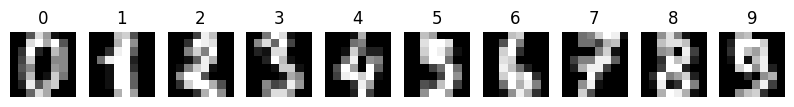

In [26]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(10,10,i+1)
    plt.imshow(digits.images[i],cmap='gray')
    plt.title(digits.target[i])
    plt.axis('off')
plt.show()

In [27]:
df= pd.DataFrame(data=digits.data)
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

In [28]:
X= digits.data
y= digits.target

In [29]:
# print the names of the 13 features
print("Features: ",digits.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", digits.target_names)


Features:  ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
Labels:  [0 1 2 3 4 5 6 7 8 9]


## 🤖 SVM Model Training

We initialize and train an SVM classifier using the training data.


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

## ✅ Model Prediction and Evaluation

We predict the test dataset and calculate the accuracy score to evaluate the model's performance.


In [32]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [33]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


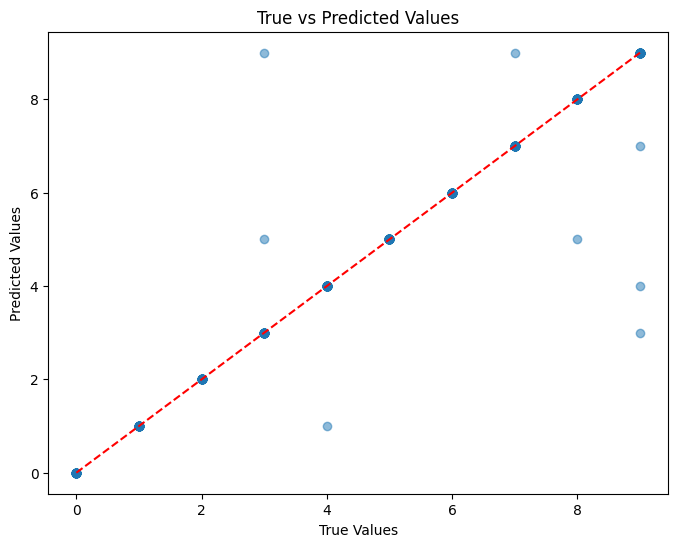

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

## 📈 Scatter Plot - True vs Predicted Values

The scatter plot below compares the true values with the model's predictions.
A perfect model would have all points aligned along the diagonal.


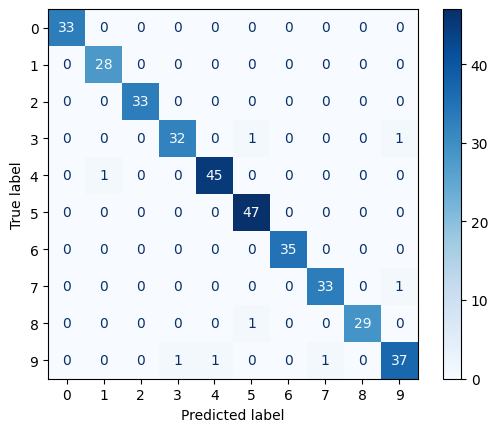

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap='Blues')
plt.show()


## 🔄 Confusion Matrix - Model Evaluation

The confusion matrix below shows the performance of the SVM classifier,
highlighting which digits were correctly predicted and where the model struggled.


## 📌 Conclusion

- The SVM model shows strong performance on the Digits dataset.
- The confusion matrix provides insights into which classes are harder to predict.
- Further improvements could include hyperparameter tuning or trying different kernels (e.g., 'rbf').
